In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [ ]:
from fastai.vision import *
from fastai.vision.gan import *


In [ ]:
path=untar_data(URLs.LSUN_BEDROOMS)

In [ ]:
def get_data(bs,size):
  return (GANItemList.from_folder(path,noise_sz=100)
              .split_none()
              .label_from_func(noop)
              .transform(tfms=[[crop_pad(size=size,row_pct=(0,1),col_pct=(0,1))],[]],size=size,tfm_y=True)
              .databunch(bs=bs)
              .normalize(stats=[torch.tensor([0.5,0.5,0.5]),torch.tensor([0.5,0.5,0.5])],do_x=False,do_y=True))

In [ ]:
data=get_data(128,64)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

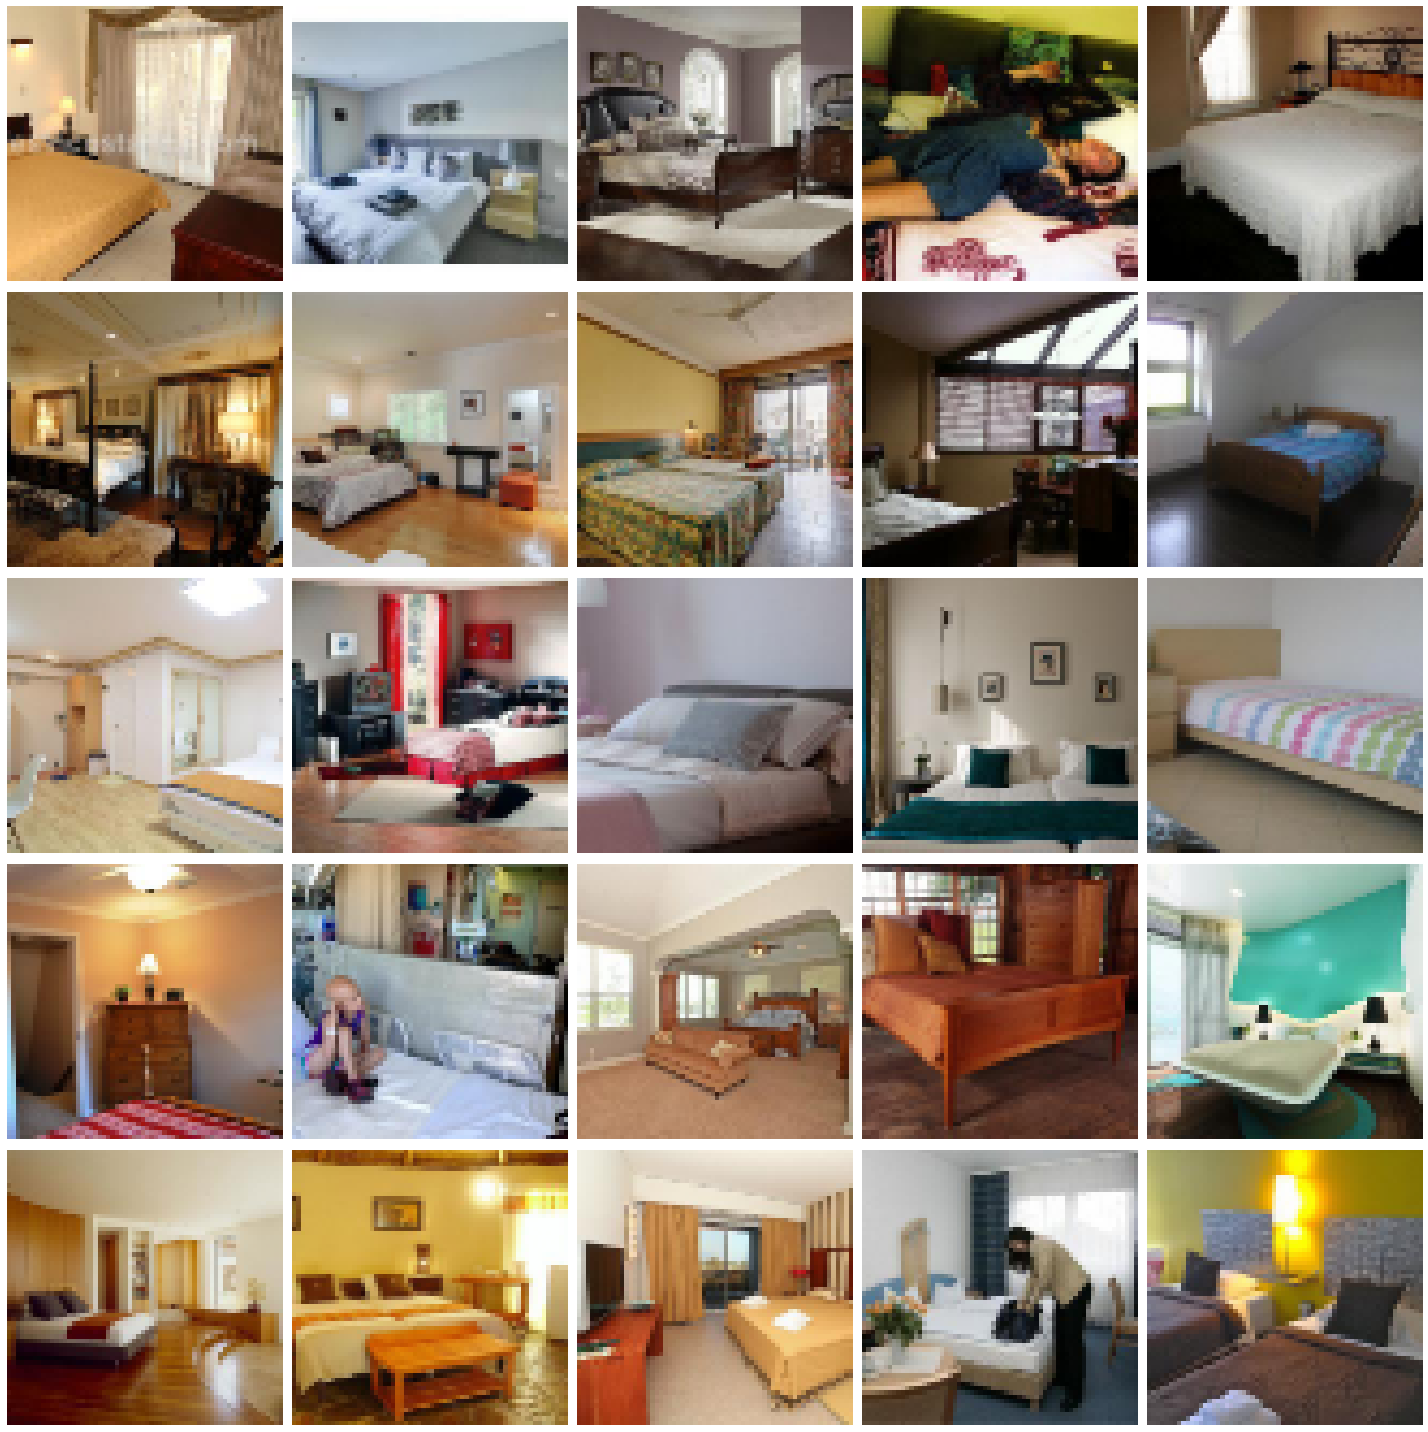

In [ ]:
data.show_batch(rows=5)

In [ ]:
generator=basic_generator(in_size=64,n_channels=3,n_extra_layers=1)
critic=basic_critic(in_size=64,n_channels=3,n_extra_layers=1)

In [ ]:
learn=GANLearner.wgan(data,generator,critic,switch_eval=False,
                      opt_func=partial(optim.Adam,betas=(0,0.99)),wd=0)

In [ ]:
learn.fit(5,2e-4)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time


Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please s

Buffered data was truncated after reaching the output size limit.

In [ ]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train,rows=16,figsize=(8,8))